### Use Natural Language Processing and Machine Learning to predict Microsoft prices

In [214]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [215]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AsfiaHossoin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AsfiaHossoin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Importing Microsoft Data (Numerical data)

In [216]:
## 5 years worth of data 28th Nov 2017 to 28th Nov 2022
msft = pd.read_csv('MSFT.csv')

In [217]:
## exploring the data
msft.tail() 

Date        Open        High         Low       Close   Adj Close  \
1254  2022-11-21  241.429993  244.669998  241.190002  242.050003  242.050003   
1255  2022-11-22  243.589996  245.309998  240.710007  245.029999  245.029999   
1256  2022-11-23  245.110001  248.279999  244.270004  247.580002  247.580002   
1257  2022-11-25  247.309998  248.699997  246.729996  247.490005  247.490005   
1258  2022-11-28  246.080002  246.649994  240.800003  241.759995  241.759995   

        Volume  
1254  26394700  
1255  19665700  
1256  19508500  
1257   9200800  
1258  24778200

In [218]:
## Checking data type to ensure they are in the correct format
## Date column needs to be converted to date time object, rest of the columns are fine
msft.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [219]:
## Converting to datetime
msft["Date"] = pd.to_datetime(msft["Date"],format="%Y/%m/%d")

In [220]:
## rechecking data type to ensure the dates have been converted
msft.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [221]:
msft.isnull().sum() ## checking for nulls, no nulls

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [222]:
msft.describe() ## checking the statistics of the data

Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    190.907006   192.895830   188.788912   190.929523   187.100004   
std      75.669671    76.449341    74.819014    75.671658    76.561632   
min      81.339996    82.680000    80.699997    81.080002    76.354248   
25%     114.159999   114.905003   113.595001   114.315002   109.116199   
50%     185.750000   187.699997   183.580002   186.270004   182.021713   
75%     255.895004   258.684998   252.650002   254.165001   252.456162   
max     344.619995   349.670013   342.200012   343.109985   339.924835   

             Volume  
count  1.259000e+03  
mean   3.013054e+07  
std    1.280924e+07  
min    8.989200e+06  
25%    2.216800e+07  
50%    2.691080e+07  
75%    3.425455e+07  
max    1.112421e+08

### Creating Data Dictionary

In [223]:
msft_dict  = pd.DataFrame({'Column_name': [i for i in msft.columns], 
                              'Column_type': [i for i in msft.dtypes],
                             'Brief Description': ['The date at which the stock prices were collected',
                                                   'The price when stock market opens','The maximum price reached on a given day',
                                                   'The minimum price reached on a given day','The price when stock market closes',
                                                   'The adjusted price at closing time taking into account stock splits and dividends',
                                                   'The number of shares traded during a given period of time']})


pd.set_option('display.max_colwidth', None) ## to show the full content of each column wihtout truncating anything
msft_dict

Column_name     Column_type  \
0        Date  datetime64[ns]   
1        Open         float64   
2        High         float64   
3         Low         float64   
4       Close         float64   
5   Adj Close         float64   
6      Volume           int64   

                                                                   Brief Description  
0                                  The date at which the stock prices were collected  
1                                                  The price when stock market opens  
2                                           The maximum price reached on a given day  
3                                           The minimum price reached on a given day  
4                                                 The price when stock market closes  
5  The adjusted price at closing time taking into account stock splits and dividends  
6                          The number of shares traded during a given period of time

#### Visualising 5 years' Microsoft data from 28th Nov 2017 to 28th Nov 2022

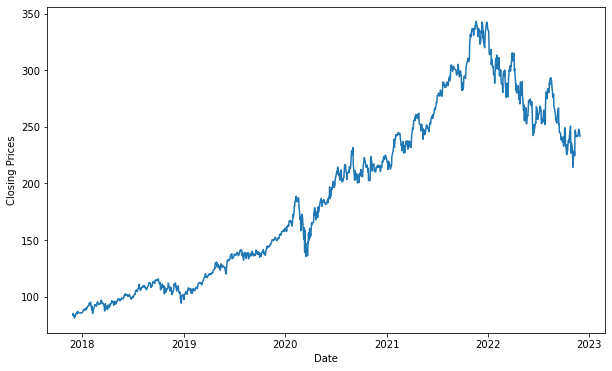

In [224]:
plt.figure(figsize=(10,6))
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(msft['Date'],msft['Close'])

#### Showcasing the trend by smoothing out the fluctuations by taking the moving average and showing the spread of the data relative to the moving average by plotting the standard deviation.

The standard deviation is very high indicating the data is more spread out and far away from the mean.

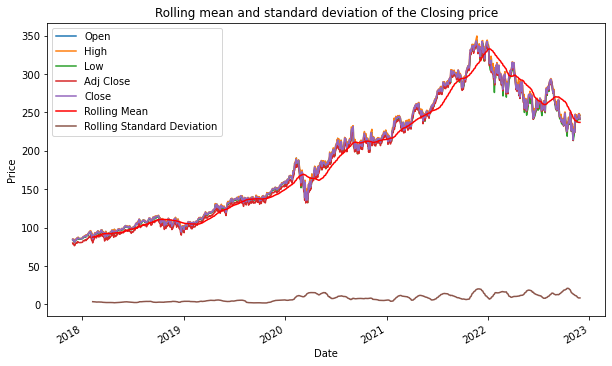

In [225]:
msft1 = msft.set_index('Date')
ma = msft1['Close'].rolling(window = 50).mean() ## moving average
std = msft1['Close'].rolling(window = 50).std() ## standard deviation

plt.figure(figsize=(10,6))
msft1['Open'].plot(label='Open')
msft1['High'].plot(label='High')
msft1['Low'].plot(label='Low')
msft1['Adj Close'].plot(label='Adj Close')
msft1['Close'].plot(label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling mean and standard deviation of the Closing price')
plt.legend()

### Importing the headlines table (Textual data)

In [226]:
## semi-cleaned headlines from power BI and excel
headlines = pd.read_csv('headlines.csv')

In [227]:
## exploring the data
headlines.head()

Dates  \
0  28/11/2022   
1  25/11/2022   
2  24/11/2022   
3  24/11/2022   
4  24/11/2022   

                                                                 Headline_text  
0  EXCLUSIVE Microsoft likely to offer EU concessions soon in Activision deal   
1                           Is the Activision Microsoft Deal Really in Danger?  
2  EXCLUSIVE EU antitrust regulators ramp up Microsoft scrutiny, probe likely   
3                          Why Is Microsoft  Up 7% Since Last Earnings Report?  
4                      Microsoft  Continues to Face Threats on Activision Deal

In [228]:
## Checking the data type
## Dates are objects, need to be converted to date time
## Headline_text column is fine, it is a string as we want it to be
headlines.dtypes

Dates            object
Headline_text    object
dtype: object

In [229]:
headlines.shape ## checking the dimensions of the table
headlines.isnull().sum() ## Checking for nulls, no nulls

Dates            0
Headline_text    0
dtype: int64

In [230]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dates          4280 non-null   object
 1   Headline_text  4280 non-null   object
dtypes: object(2)
memory usage: 67.0+ KB


In [231]:
##removing unwanted characters such as ?,@,.and creating a new column with the clean headlines
headlines['clean_headline'] = headlines['Headline_text'].replace("[',?$;:'!&""@''().%']","",regex=True)

In [232]:
headlines.head(63)

Dates  \
0   28/11/2022   
1   25/11/2022   
2   24/11/2022   
3   24/11/2022   
4   24/11/2022   
..         ...   
58  02/11/2022   
59  02/11/2022   
60  01/11/2022   
61  01/11/2022   
62  01/11/2022   

                                                                                                                 Headline_text  \
0                                                  EXCLUSIVE Microsoft likely to offer EU concessions soon in Activision deal    
1                                                                           Is the Activision Microsoft Deal Really in Danger?   
2                                                  EXCLUSIVE EU antitrust regulators ramp up Microsoft scrutiny, probe likely    
3                                                                          Why Is Microsoft  Up 7% Since Last Earnings Report?   
4                                                                      Microsoft  Continues to Face Threats on Activision Deal   
..                                                                                                                         ...   
58                                                                                    Why Is Everyone Talking About Microsoft?   
59                                                  Microsoft's president warns of talent shortage for tackling climate change   
60                                           OREO THINS and Microsoft 365 Make a Film about Dogs and Office Life. Wait, what??   
61                                       SOPHiA GENETICS Partners with Microsoft to Accelerate Multimodal Health Data Analysis   
62  WorkSpan Announces Launch of Co Sell Automation Platform for ISVs and Services Partners in Microsoft Cloud Partner Program   

                                                                                                                clean_headline  
0                                                  EXCLUSIVE Microsoft likely to offer EU concessions soon in Activision deal   
1                                                                            Is the Activision Microsoft Deal Really in Danger  
2                                                   EXCLUSIVE EU antitrust regulators ramp up Microsoft scrutiny probe likely   
3                                                                            Why Is Microsoft  Up 7 Since Last Earnings Report  
4                                                                      Microsoft  Continues to Face Threats on Activision Deal  
..                                                                                                                         ...  
58                                                                                     Why Is Everyone Talking About Microsoft  
59                                                   Microsofts president warns of talent shortage for tackling climate change  
60                                               OREO THINS and Microsoft 365 Make a Film about Dogs and Office Life Wait what  
61                                       SOPHiA GENETICS Partners with Microsoft to Accelerate Multimodal Health Data Analysis  
62  WorkSpan Announces Launch of Co Sell Automation Platform for ISVs and Services Partners in Microsoft Cloud Partner Program  

[63 rows x 3 columns]

In [233]:
## Converting to datetime
headlines["Dates"] = pd.to_datetime(headlines["Dates"],format="%d/%m/%Y")

## reversing the dates, ordering them in ascending order
headline = headlines.iloc[::-1].reset_index().drop('index', axis =1)

## making all the letters lowercase in the clean_headline
headline['clean_headline'] = headline['clean_headline'].str.lower()
headline   ## checking to make sure all the changes have been implemented

Dates  \
0    2017-11-28   
1    2017-11-29   
2    2017-11-30   
3    2017-12-04   
4    2017-12-04   
...         ...   
4275 2022-11-24   
4276 2022-11-24   
4277 2022-11-24   
4278 2022-11-25   
4279 2022-11-28   

                                                                    Headline_text  \
0                     Microsoft and SAP Partnership to Aid Digital Transformation   
1              Microsoft Is Most Popular Stock of Investment Firms in 3rd Quarter   
2         Microsoft, Adobe Now Fly In The Cloud; Is Artificial Intelligence Next?   
3          Stocks Fade, Close Mainly Lower; Microsoft Tumbles But Chevron Rallies   
4                 Andreas Halvorsen Trims Deere, Microsoft, Wells Fargo Positions   
...                                                                           ...   
4275                      Microsoft  Continues to Face Threats on Activision Deal   
4276                          Why Is Microsoft  Up 7% Since Last Earnings Report?   
4277  EXCLUSIVE EU antitrust regulators ramp up Microsoft scrutiny, probe likely    
4278                           Is the Activision Microsoft Deal Really in Danger?   
4279  EXCLUSIVE Microsoft likely to offer EU concessions soon in Activision deal    

                                                                   clean_headline  
0                     microsoft and sap partnership to aid digital transformation  
1              microsoft is most popular stock of investment firms in 3rd quarter  
2            microsoft adobe now fly in the cloud is artificial intelligence next  
3            stocks fade close mainly lower microsoft tumbles but chevron rallies  
4                   andreas halvorsen trims deere microsoft wells fargo positions  
...                                                                           ...  
4275                      microsoft  continues to face threats on activision deal  
4276                            why is microsoft  up 7 since last earnings report  
4277   exclusive eu antitrust regulators ramp up microsoft scrutiny probe likely   
4278                            is the activision microsoft deal really in danger  
4279  exclusive microsoft likely to offer eu concessions soon in activision deal   

[4280 rows x 3 columns]

In [234]:
headline.dtypes ##checking the datatype to ensure Dates column is datetime after converting

Dates             datetime64[ns]
Headline_text             object
clean_headline            object
dtype: object

### Creating Data Dictionary

In [235]:
headlines_dict  = pd.DataFrame({'Column_name': [i for i in headline.columns], 
                              'Column_type': [i for i in headline.dtypes],
                             'Brief Description': ['The dates at which the news articles were published',
                                                   'News headlines not cleaned',
                                                   'News headlines after cleaning']})

pd.set_option('display.max_colwidth', None)
headlines_dict

Column_name     Column_type  \
0           Dates  datetime64[ns]   
1   Headline_text          object   
2  clean_headline          object   

                                     Brief Description  
0  The dates at which the news articles were published  
1                           News headlines not cleaned  
2                        News headlines after cleaning

#### Preprocessing the Textual data

The textblob librabry assigns a subjectivity and polarity scores to the headlines based on a pre-defined dictionary of weighted words. The subjectivity score ranges from 0 to 1 and higher subjectivity implies more opinionated data compared to factual. Polarity score ranges from -1 to 1 where -1 being most negative and 1 being most positive.

In [236]:
## the functions compute the subjectivity and polarity score
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def Polarity(text):
    return  TextBlob(text).sentiment.polarity

headline['Subjectivity'] = headline['clean_headline'].apply(Subjectivity)
headline['Polarity']     = headline['clean_headline'].apply(Polarity)

<AxesSubplot:>

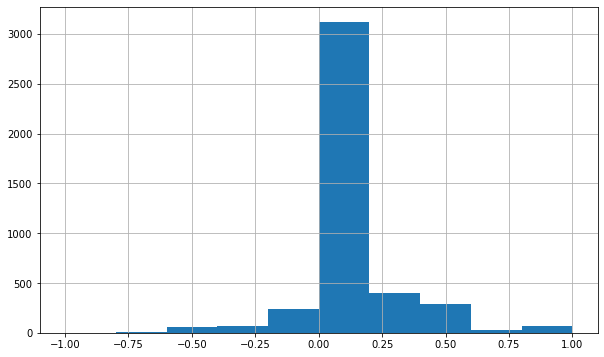

In [237]:
## Visualising the Polarity of the data
## It shows there are a lot more neutral headlines compared to positive and negative headlines
plt.figure(figsize = (10,6))
headline['Polarity'].hist()

<AxesSubplot:>

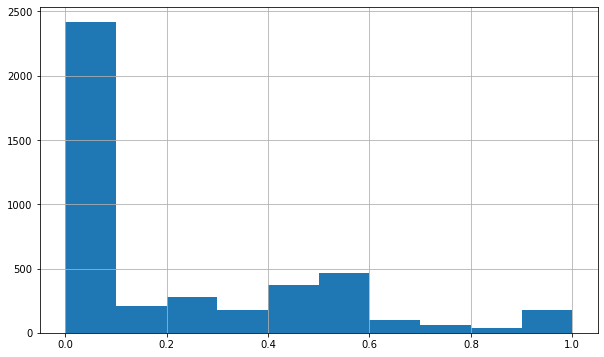

In [238]:
## Visualising the subjectivity of the textual data 
## Clearly there are more factual data compared to opinions
plt.figure(figsize = (10,6))
headline['Subjectivity'].hist()

The headlines' dataset is biased towards factual and neutral data

### Perform sentimental analysis over the news headlines

In [239]:
snt = SentimentIntensityAnalyzer() ##create the object

In [240]:
##computing the sentimental (positive,negative, compound, neutra) scores and adding to dataframe
headline['Compound'] = [snt.polarity_scores(i)['compound'] for i in headline['clean_headline']]
headline['Negative'] = [snt.polarity_scores(i)['neg'] for i in headline['clean_headline']]
headline['Neutral'] = [snt.polarity_scores(i)['neu'] for i in headline['clean_headline']]
headline['Positive'] = [snt.polarity_scores(i)['pos'] for i in headline['clean_headline']]
headline

Dates  \
0    2017-11-28   
1    2017-11-29   
2    2017-11-30   
3    2017-12-04   
4    2017-12-04   
...         ...   
4275 2022-11-24   
4276 2022-11-24   
4277 2022-11-24   
4278 2022-11-25   
4279 2022-11-28   

                                                                    Headline_text  \
0                     Microsoft and SAP Partnership to Aid Digital Transformation   
1              Microsoft Is Most Popular Stock of Investment Firms in 3rd Quarter   
2         Microsoft, Adobe Now Fly In The Cloud; Is Artificial Intelligence Next?   
3          Stocks Fade, Close Mainly Lower; Microsoft Tumbles But Chevron Rallies   
4                 Andreas Halvorsen Trims Deere, Microsoft, Wells Fargo Positions   
...                                                                           ...   
4275                      Microsoft  Continues to Face Threats on Activision Deal   
4276                          Why Is Microsoft  Up 7% Since Last Earnings Report?   
4277  EXCLUSIVE EU antitrust regulators ramp up Microsoft scrutiny, probe likely    
4278                           Is the Activision Microsoft Deal Really in Danger?   
4279  EXCLUSIVE Microsoft likely to offer EU concessions soon in Activision deal    

                                                                   clean_headline  \
0                     microsoft and sap partnership to aid digital transformation   
1              microsoft is most popular stock of investment firms in 3rd quarter   
2            microsoft adobe now fly in the cloud is artificial intelligence next   
3            stocks fade close mainly lower microsoft tumbles but chevron rallies   
4                   andreas halvorsen trims deere microsoft wells fargo positions   
...                                                                           ...   
4275                      microsoft  continues to face threats on activision deal   
4276                            why is microsoft  up 7 since last earnings report   
4277   exclusive eu antitrust regulators ramp up microsoft scrutiny probe likely    
4278                            is the activision microsoft deal really in danger   
4279  exclusive microsoft likely to offer eu concessions soon in activision deal    

      Subjectivity  Polarity  Compound  Negative  Neutral  Positive  
0         0.000000  0.000000    0.0000     0.000    1.000     0.000  
1         0.466667  0.366667    0.4754     0.000    0.764     0.236  
2         0.633333  0.066667    0.4767     0.000    0.763     0.237  
3         0.333333  0.166667   -0.1531     0.151    0.849     0.000  
4         0.000000  0.000000    0.2500     0.000    0.778     0.222  
...            ...       ...       ...       ...      ...       ...  
4275      0.000000  0.000000   -0.4215     0.286    0.714     0.000  
4276      0.066667  0.000000    0.0000     0.000    1.000     0.000  
4277      1.000000  0.000000    0.1280     0.000    0.857     0.143  
4278      0.200000  0.200000   -0.5688     0.344    0.656     0.000  
4279      1.000000  0.000000    0.1280     0.000    0.870     0.130  

[4280 rows x 9 columns]

### Merge the Numerical and Textual Data

Notice, in some cases I have multiple news headlines (not duplicated) for each day for example, 2022-11-24 has 3 different news headlines. During the cleaning process, I got rid of any duplicates in the news headlines i.e. if for example, 'I want waffle fries' appeared twice or more for the same date, I removed the repeating rows leaving only one so, all the headlines are unique for each date but the dates could be repeating as there could be multiple unique headlines for each date. <br>

I would like to join the headlines table to the stock price table using the dates. But repeating dates is a problem because the stock table has daily prices meaning there are no repeading dates, there is one instance of every date. So, to get around this problem, I will groupby the dates and take the mean of Subjectivity, polarity,Compound, Negative, Neutral and Positive columns so, I will only have one instance of each date in the headlines dataset.

In [241]:
## Groupby dates and take the mean of the scores
date_headline_grouped = headline.groupby('Dates').mean()

In [242]:
merge = msft.join(date_headline_grouped, on = 'Date') # joining the two tables
null = merge[merge.isna().any(axis=1)] ## showing all the columns with nan values
## The nan values are due to the headline data not having any news for the corresponding dates
##the nans have been dropped

null.Date.dt.year.value_counts()## showing the total number of missing headlines in each year
## 2018 has the most missing headlines

merge_no_nulls = merge.dropna(axis = 0) ## dropping all records with nan values
merge_no_nulls.shape ## 1134 x 13
#merge.shape         ## 1259 x 13

(1134, 13)

In [243]:
## reshuffling the columns so that the target variable ('Close column') is at the end
## this will make life easier to select columns when splitting for train,test and scaling
merge_no_nulls = merge_no_nulls[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume','Subjectivity',
                                 'Polarity','Compound','Negative','Neutral','Positive', 'Close']]

In [244]:
## resetting the index creates an additional column with the old indices
## so dropping that additional column using drop after resetting index
merge_no_nulls = merge_no_nulls.reset_index().drop('index', axis=1)

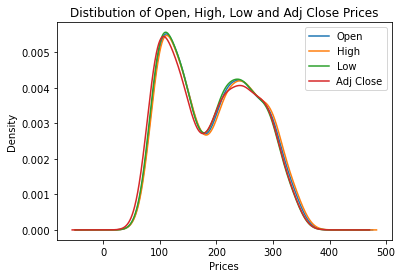

<AxesSubplot:title={'center':'Distibution of Volume of Stocks Traded'}, xlabel='Volume', ylabel='Density'>

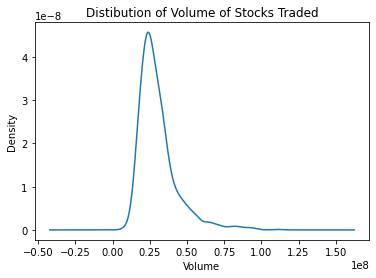

In [245]:
## Checking the distribution of the open, high, low, adj close prices, volumes
merge_no_nulls['Open'].plot(kind='kde', label = 'Open')
merge_no_nulls['High'].plot(kind='kde', label = 'High')
merge_no_nulls['Low'].plot(kind='kde',  label = 'Low')
merge_no_nulls['Adj Close'].plot(kind='kde', label = 'Adj Close')
plt.title('Distibution of Open, High, Low and Adj Close Prices')
plt.xlabel('Prices')
plt.legend()
plt.show()
plt.title('Distibution of Volume of Stocks Traded')
plt.xlabel('Volume')
merge_no_nulls['Volume'].plot(kind='kde', label = 'Volume')

### Pairplot

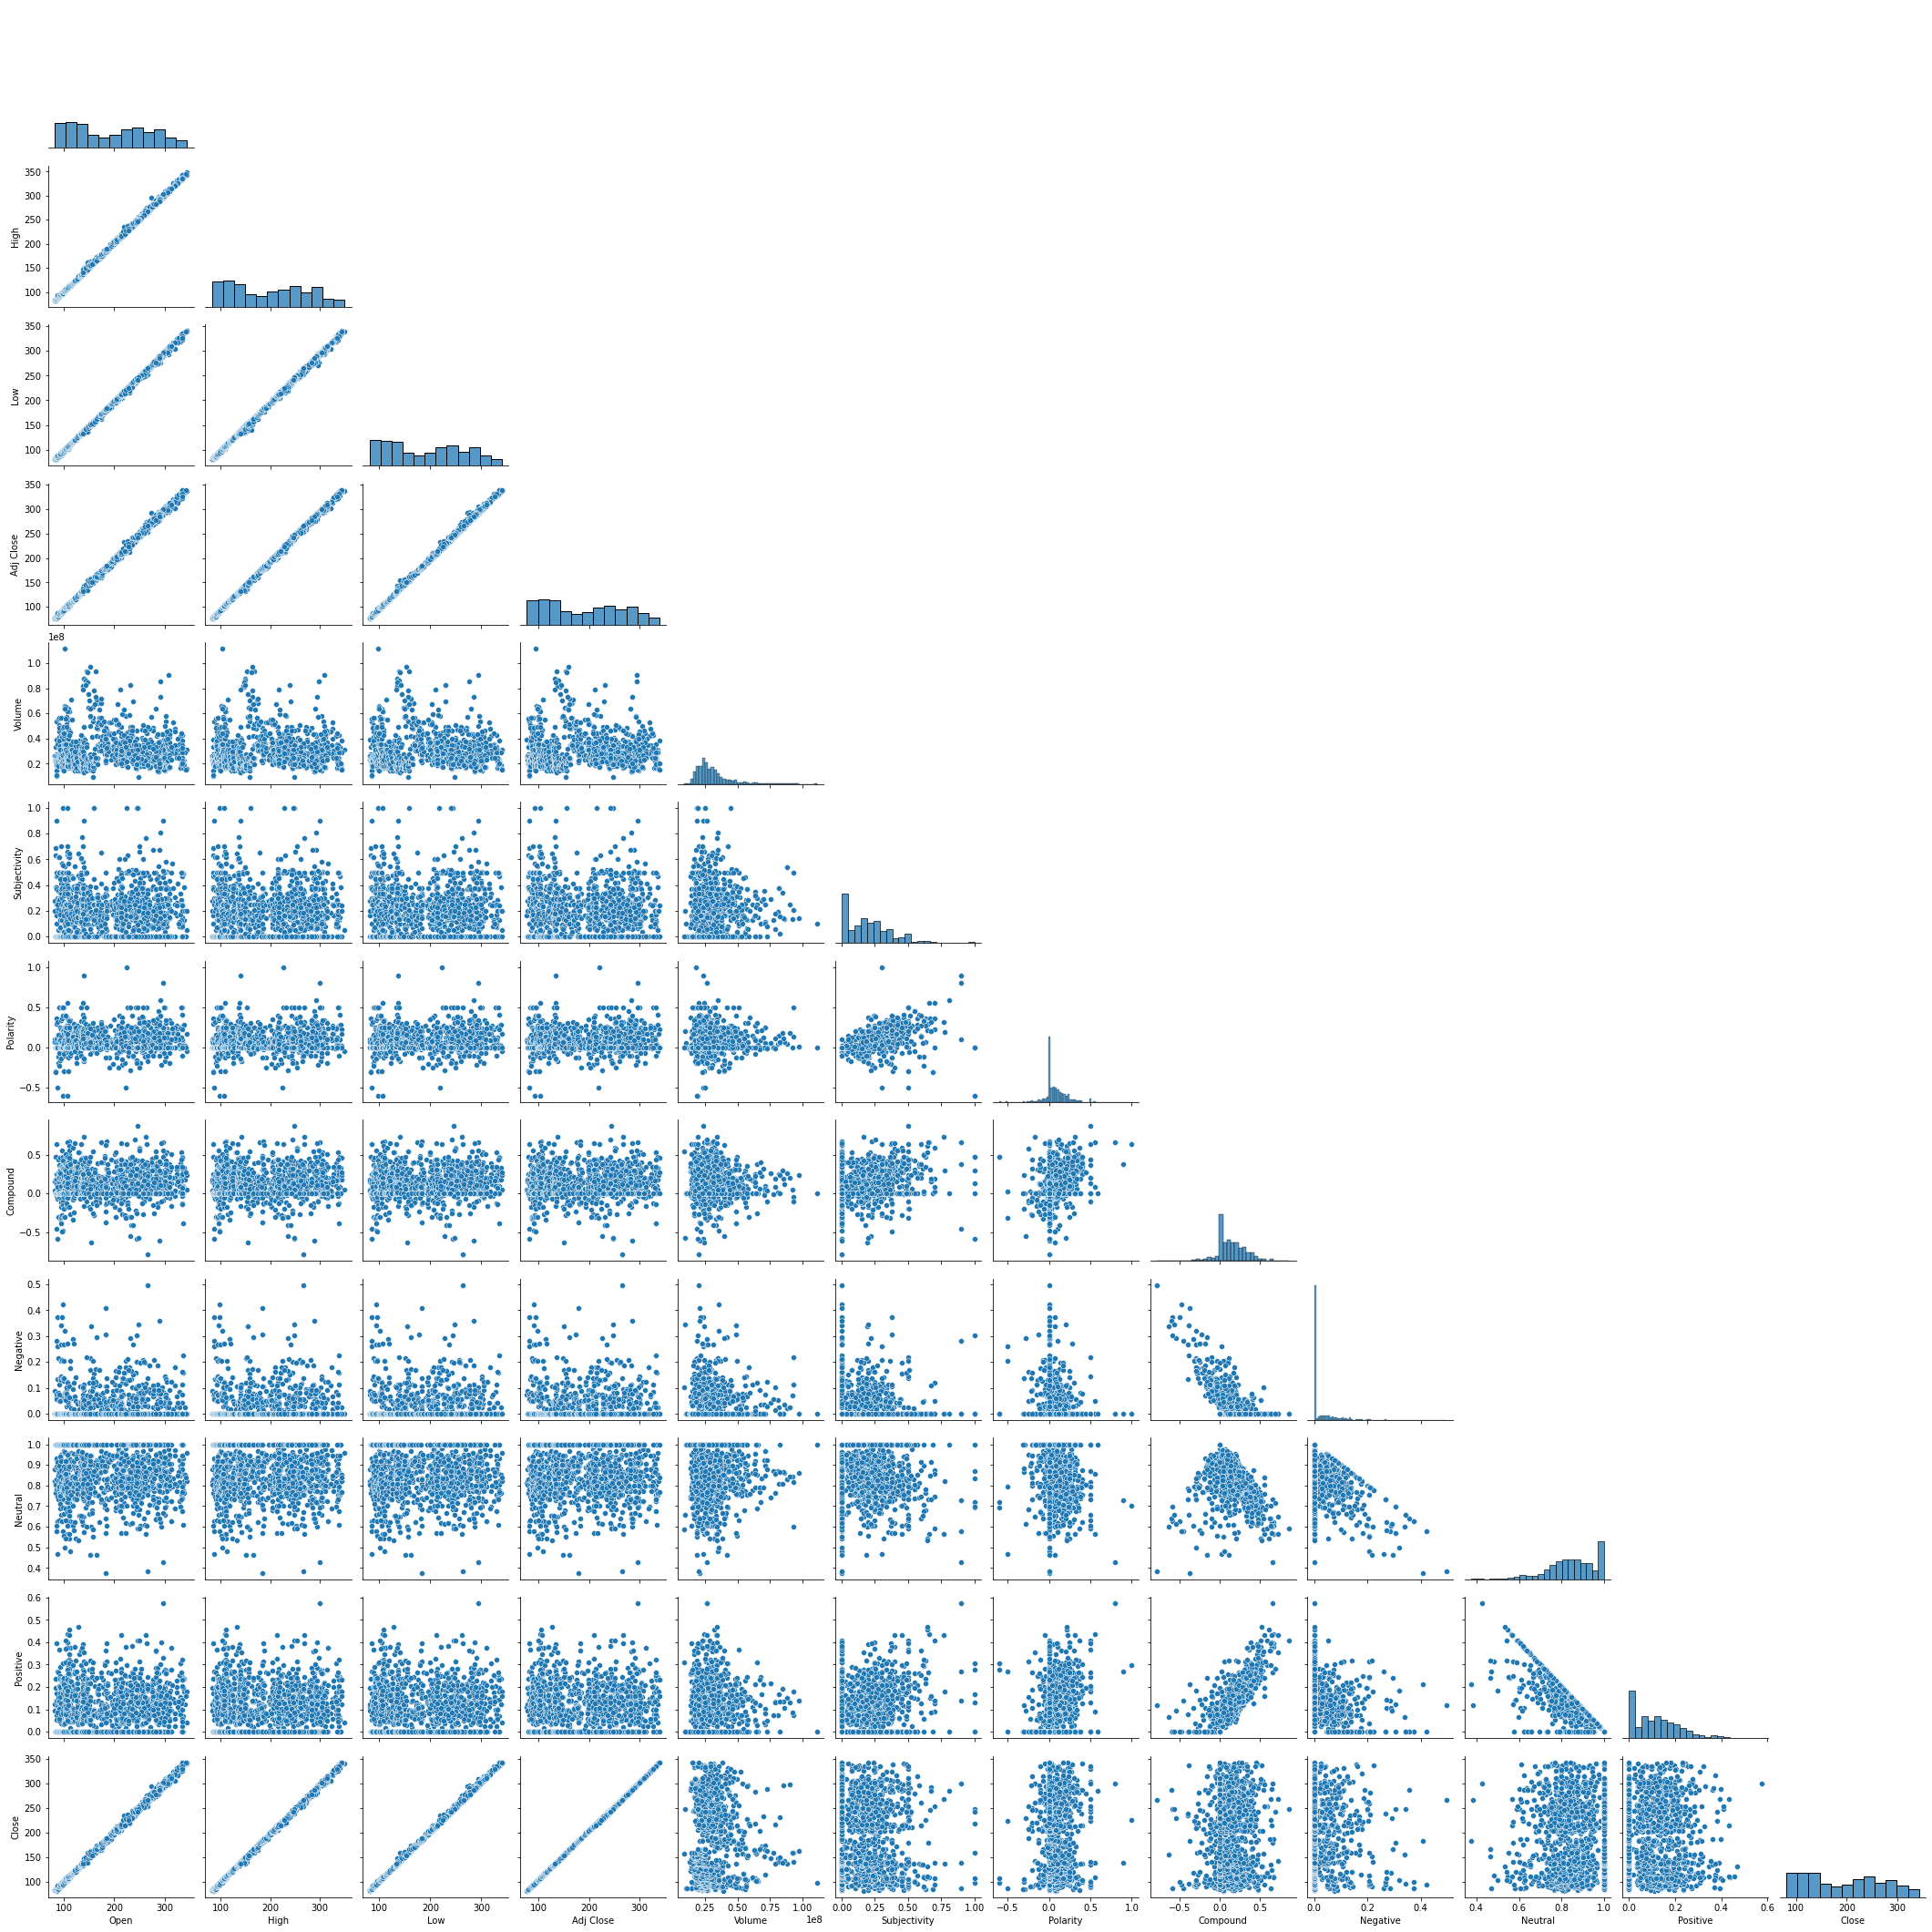

In [246]:
## Quick look at the pairplots to explore the relationships between all the varibales
## The target variable, Closing price has a linear relationship with open, high, low, Adj close 
sns.pairplot(merge_no_nulls, corner = True)

### Normalising the numerical data

In [247]:
scaler = MinMaxScaler()
merge_scaled = scaler.fit_transform(merge_no_nulls.iloc[:,1:-7])

semi_scaled = pd.DataFrame(merge_scaled, columns = merge_no_nulls.iloc[:,1:-7].columns)
semi_scaled

Open      High       Low  Adj Close    Volume
0     0.010369  0.008914  0.012788   0.013606  0.126518
1     0.012800  0.008390  0.009552   0.008092  0.179867
2     0.008242  0.006892  0.010169   0.011064  0.235352
3     0.011699  0.006555  0.000000   0.000000  0.294424
4     0.000000  0.000000  0.001079   0.001826  0.167850
...        ...       ...       ...        ...       ...
1129  0.608060  0.606727  0.618173   0.630008  0.170220
1130  0.616264  0.609124  0.616324   0.641338  0.104413
1131  0.622037  0.620248  0.630036   0.651034  0.102875
1132  0.630394  0.621821  0.639512   0.650692  0.002069
1133  0.625722  0.614143  0.616671   0.628905  0.154411

[1134 rows x 5 columns]

In [248]:
##creating a dataframe with the headlines data by joining with normalised numerical data
semi_scaled_merged = semi_scaled.join(merge_no_nulls.iloc[:,[0,6,7,8,9,10,11,12]], on = semi_scaled.index)
## reshuffling columns to make selecting them easier
semi_scaled_merged = semi_scaled_merged[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume','Subjectivity',
                                 'Polarity','Compound','Negative','Neutral','Positive', 'Close']]

##setting date column as the index
semi_scaled_merged = semi_scaled_merged.set_index('Date')

In [249]:
## X is the independent variables and y is the target variable
X = semi_scaled_merged.iloc[:,:11] 
y = semi_scaled_merged.iloc[:, [-1]]

In [250]:
## splitting the data into train and test
## shuffle = False ensures the data is not randomised before splitting it.
## As it is a time series the data has to be in order
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42, shuffle = False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train.tail()

(1020, 11) (114, 11) (1020, 1) (114, 1)


Open      High       Low  Adj Close    Volume  Subjectivity  \
Date                                                                          
2022-05-25  0.671528  0.681299  0.679570   0.702925  0.191278      0.142857   
2022-05-26  0.687215  0.690775  0.696133   0.715713  0.156601      0.303175   
2022-05-27  0.710802  0.714109  0.719744   0.743484  0.175267      0.219798   
2022-05-31  0.726185  0.719465  0.725021   0.738301  0.282031      0.080556   
2022-06-01  0.736326  0.730402  0.729297   0.740382  0.159438      0.000000   

            Polarity  Compound  Negative  Neutral  Positive  
Date                                                         
2022-05-25 -0.071429  -0.10270     0.202   0.6380    0.1600  
2022-05-26  0.068254   0.00000     0.000   1.0000    0.0000  
2022-05-27  0.011717   0.12972     0.000   0.9138    0.0862  
2022-05-31 -0.072222   0.00000     0.000   1.0000    0.0000  
2022-06-01  0.000000   0.17000     0.000   0.8125    0.1875

## Apply Models to Numerical and Textual Data

In [251]:
## lists for the metric scores
mse = []
r2  = []
rmse = []
mae  = []
model = ['Random Forest', 'Decision Tree', 'MLR', 'Lasso', 'Ridge']

### Random Forest Regressor

In [252]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

mse.append(mean_squared_error(pred_rf,y_test))
r2.append(r2_score(y_test, pred_rf))
rmse.append(mean_squared_error(y_test,pred_rf,squared=False))
mae.append(mean_absolute_error(y_test,pred_rf))

C:\Users\AsfiaHossoin\AppData\Local\Temp\ipykernel_15908\815586540.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


### Decision Tree Regressor

In [253]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
pred_tree = dec_tree.predict(x_test)

#print('Mean Squared error: ',mean_squared_error(pred_tree,y_test))
r2.append(r2_score(y_test, pred_tree))
mse.append(mean_squared_error(pred_tree,y_test))
rmse.append(mean_squared_error(y_test,pred_tree,squared=False))
mae.append(mean_absolute_error(y_test,pred_tree))

### MLR

In [254]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
pred_mlr = regressor.predict(x_test)

r2.append(r2_score(y_test, pred_mlr))
mse.append(mean_squared_error(pred_mlr,y_test))
rmse.append(mean_squared_error(y_test,pred_mlr,squared=False))
mae.append(mean_absolute_error(y_test,pred_mlr))
#print('Mean Squared error: ',mean_squared_error(pred_mlr,y_test))

### Lasso

In [255]:
lasso = Lasso()
lasso.fit(x_train, y_train) ## training the lasso model

pred_lasso = lasso.predict(x_test) ## predicitng the prices

r2.append(r2_score(y_test, pred_lasso))
mse.append(mean_squared_error(pred_lasso,y_test))
rmse.append(mean_squared_error(y_test,pred_lasso,squared=False))
mae.append(mean_absolute_error(y_test,pred_lasso))
#print('Mean Squared error: ',mean_squared_error(pred_lasso,y_test))
lasso.coef_

C:\Users\AsfiaHossoin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e+02, tolerance: 5.848e+02
  model = cd_fast.enet_coordinate_descent(


array([  0.        ,   0.        ,  66.59056106, 182.7406878 ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ])

### Ridge

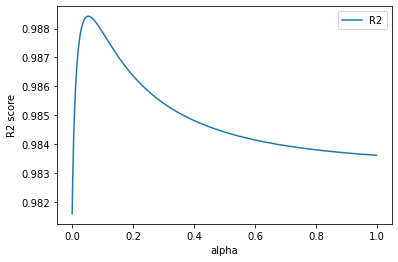

alpha with highest r^2 score : 0.053
alpha with lowest mse score : 0.053


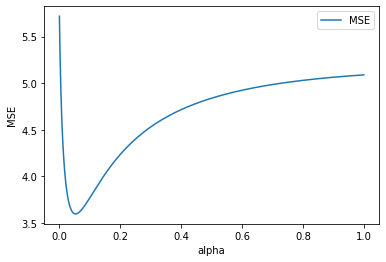

In [256]:
## looking for optimal value for alpha that gives the lowest mse, rmse, mae, turns out 0.053
alpa = np.arange(0,1,0.001)
alpa

score = []
ms = []
for i in alpa:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train,y_train) ## training the model
    pred = ridge.predict(x_test) #predicting the price sunf ridge regression
    score.append(r2_score(y_test, pred))
    ms.append(mean_squared_error(y_test, pred))
    
plt.plot(alpa, score, label = 'R2')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend()
plt.show()
plt.plot(alpa, ms, label = 'MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
print('alpha with highest r^2 score :', alpa[score.index(max(score))])
print('alpha with lowest mse score :', alpa[ms.index(min(ms))])
a1 = alpa[ms.index(min(ms))]

In [257]:
ridge = Ridge(alpha = a1)
ridge.fit(x_train,y_train)
pred_ridge = ridge.predict(x_test)

mse.append(mean_squared_error(pred_ridge,y_test))
r2.append(r2_score(y_test, pred_ridge))
rmse.append(mean_squared_error(y_test,pred_ridge,squared=False))
mae.append(mean_absolute_error(y_test,pred_ridge))
print('Mean Squared error: ',mean_squared_error(pred_ridge,y_test))

Mean Squared error:  3.5946749806021443


In [258]:
### this function plots the graphs for all the predictions
def pred_real(prediction_x, name):
    plt.plot(y_test.index, y_test['Close'], label = 'Actual')
    plt.plot(y_test.index, prediction_x, label = 'Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title(f'Actual vs. Predicted Price from {name}')
    plt.legend()
    return None

### Visualising the predictions from Numerical + Textual data

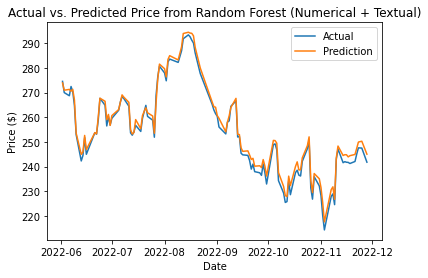

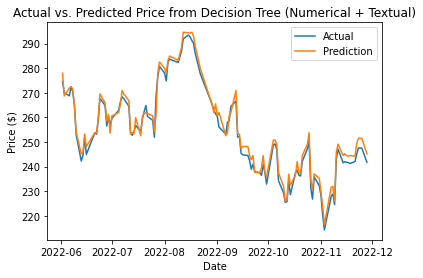

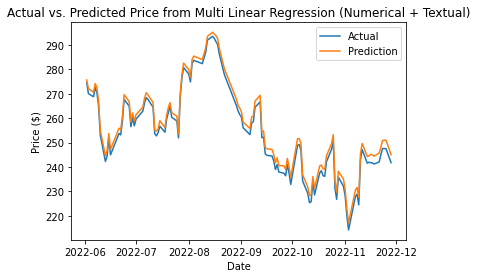

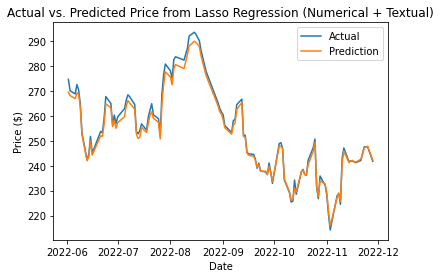

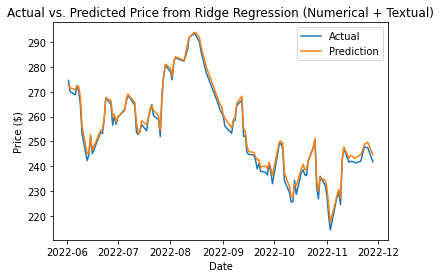

In [259]:
pred_real(pred_rf, 'Random Forest (Numerical + Textual)')
plt.show()
pred_real(pred_tree, 'Decision Tree (Numerical + Textual)')
plt.show()
pred_real(pred_mlr, 'Multi Linear Regression (Numerical + Textual)')
plt.show()
pred_real(pred_lasso, 'Lasso Regression (Numerical + Textual)')
plt.show()
pred_real(pred_ridge, 'Ridge Regression (Numerical + Textual)')
plt.show()

## Predict from Textual Data only

In [260]:
mse_text   = []
r2_text    = []
rmse_text  = []
mae_text   = []
model_text = ['Random Forest', 'Decision Tree', 'MLR', 'Lasso', 'Ridge']

In [261]:
x = semi_scaled_merged.iloc[:,5:-1]
#testing whether the constant prediction from lasso was due to normalisation error, it is not
# sc = MinMaxScaler()
# x1 = sc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42, shuffle = False)
x

Subjectivity  Polarity  Compound  Negative  Neutral  Positive
Date                                                                     
2017-11-28      0.000000  0.000000   0.00000    0.0000   1.0000     0.000
2017-11-29      0.466667  0.366667   0.47540    0.0000   0.7640     0.236
2017-11-30      0.633333  0.066667   0.47670    0.0000   0.7630     0.237
2017-12-04      0.166667  0.083333   0.04845    0.0755   0.8135     0.111
2017-12-05      0.279167  0.095833   0.15890    0.0000   0.8770     0.123
...                  ...       ...       ...       ...      ...       ...
2022-11-21      0.251515  0.112121   0.69080    0.0000   0.7170     0.283
2022-11-22      0.200000 -0.200000   0.31820    0.0000   0.8130     0.187
2022-11-23      1.000000  0.000000  -0.58590    0.3040   0.6960     0.000
2022-11-25      0.200000  0.200000  -0.56880    0.3440   0.6560     0.000
2022-11-28      1.000000  0.000000   0.12800    0.0000   0.8700     0.130

[1134 rows x 6 columns]

#### Random Forest Regressor

In [262]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf_text = rf.predict(X_test)

mse_text.append(mean_squared_error(pred_rf_text,y_test))
r2_text.append(r2_score(y_test, pred_rf_text))
rmse_text.append(mean_squared_error(y_test,pred_rf_text,squared=False))
mae_text.append(mean_absolute_error(y_test,pred_rf_text))
print('Mean Squared error:',mean_squared_error(pred_rf_text,y_test))

C:\Users\AsfiaHossoin\AppData\Local\Temp\ipykernel_15908\3853801503.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared error: 5434.773320940073


#### Decision Tree Regressor

In [263]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
pred_tree_text = dec_tree.predict(X_test)

print('Mean Squared error: ',mean_squared_error(pred_tree_text,y_test))
r2_text.append(r2_score(y_test, pred_tree_text))
mse_text.append(mean_squared_error(pred_tree_text,y_test))
rmse_text.append(mean_squared_error(y_test,pred_tree_text,squared=False))
mae_text.append(mean_absolute_error(y_test,pred_tree_text))

Mean Squared error:  10513.087236893518


#### Multi Linear Regressor

In [264]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_mlr_text = regressor.predict(X_test)

r2_text.append(r2_score(y_test, pred_mlr_text))
mse_text.append(mean_squared_error(pred_mlr_text,y_test))
rmse_text.append(mean_squared_error(y_test,pred_mlr_text,squared=False))
mae_text.append(mean_absolute_error(y_test,pred_mlr_text))
print('Mean Squared error: ',mean_squared_error(pred_mlr_text,y_test))

Mean Squared error:  4698.198876250648


#### Lasso Regressor

In [265]:
lasso = Lasso()
lasso.fit(X_train, y_train) ## training the lasso model

pred_lasso_text = lasso.predict(X_test) ## predicitng the prices

r2_text.append(r2_score(y_test, pred_lasso_text))
mse_text.append(mean_squared_error(pred_lasso_text,y_test))
rmse_text.append(mean_squared_error(y_test,pred_lasso_text,squared=False))
mae_text.append(mean_absolute_error(y_test,pred_lasso_text))
print('Mean Squared error: ',mean_squared_error(pred_lasso_text,y_test))

print('prediction from lasso:',pred_lasso_text[0])
print('mean of Close column:',msft['Close'].mean())
print('mean of Open column:',msft['Open'].mean())
print('mean of High column:',msft['High'].mean())
print('mean of Low column:', msft['Low'].mean())
print('mean of Adj Close column:', msft['Adj Close'].mean())
lasso.coef_
lasso.intercept_

Mean Squared error:  4610.881844222141
prediction from lasso: 187.75664703039214
mean of Close column: 190.92952336219247
mean of Open column: 190.9070055623512
mean of High column: 192.89583000238295
mean of Low column: 188.78891176648125
mean of Adj Close column: 187.10000386576664


array([187.75664703])

#### Ridge Regressor

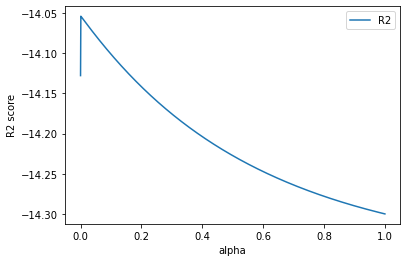

alpha with highest r^2 score : 0.001
alpha with lowest mse score : 0.001


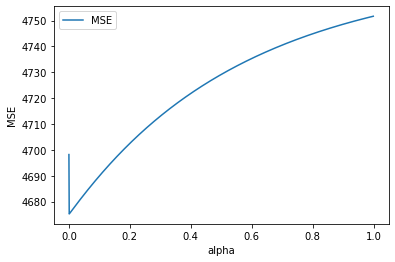

In [266]:
alpa = np.arange(0,1,0.001)
alpa

score = []
ms = []
for i in alpa:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train) ## training the model
    pred = ridge.predict(X_test) #predicting the price sunf ridge regression
    score.append(r2_score(y_test, pred))
    ms.append(mean_squared_error(y_test, pred))
    
plt.plot(alpa, score, label = 'R2')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend()
plt.show()
plt.plot(alpa, ms, label = 'MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
print('alpha with highest r^2 score :', alpa[score.index(max(score))])
print('alpha with lowest mse score :', alpa[ms.index(min(ms))])
a2 = alpa[ms.index(min(ms))]

In [267]:
ridge = Ridge(alpha=a2)
ridge.fit(X_train,y_train)
pred_ridge_text = ridge.predict(X_test)

mse_text.append(mean_squared_error(pred_ridge_text,y_test))
r2_text.append(r2_score(y_test, pred_ridge_text))
rmse_text.append(mean_squared_error(y_test,pred_ridge_text,squared=False))
mae_text.append(mean_absolute_error(y_test,pred_ridge_text))
print('Mean Squared error: ',mean_squared_error(pred_ridge_text,y_test))

Mean Squared error:  4675.24043874525


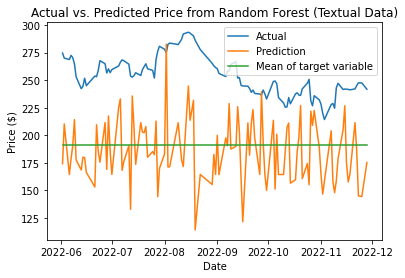

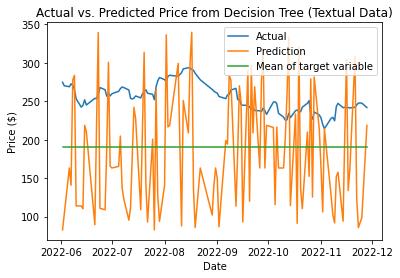

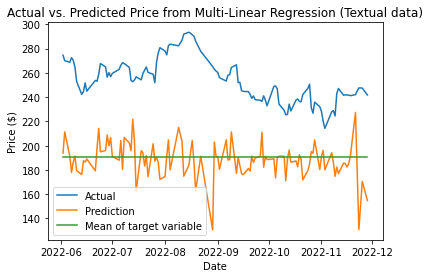

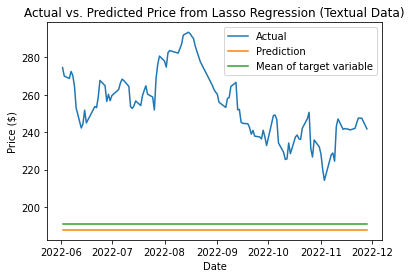

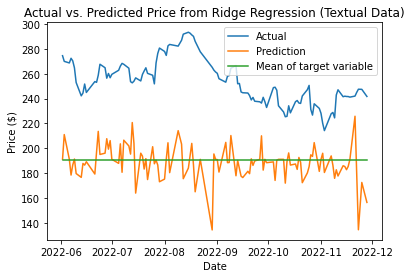

In [268]:
pred_real(pred_rf_text, 'Random Forest (Textual Data)')
plt.plot(y_test.index,[msft['Close'].mean()]*len(pred_rf_text),label = 'Mean of target variable')
plt.legend()
plt.show()
pred_real(pred_tree_text, 'Decision Tree (Textual Data)')
plt.plot(y_test.index,[msft['Close'].mean()]*len(pred_rf_text),label = 'Mean of target variable')
plt.legend()
plt.show()
pred_real(pred_mlr_text, 'Multi-Linear Regression (Textual data)')
plt.plot(y_test.index,[msft['Close'].mean()]*len(pred_rf_text),label = 'Mean of target variable')
plt.legend()
plt.show()
pred_real(pred_lasso_text, 'Lasso Regression (Textual Data)')
plt.plot(y_test.index,[msft['Close'].mean()]*len(pred_rf_text),label = 'Mean of target variable')
plt.legend()
plt.show()
pred_real(pred_ridge_text, 'Ridge Regression (Textual Data)')
plt.plot(y_test.index,[msft['Close'].mean()]*len(pred_rf_text),label = 'Mean of target variable')
plt.legend()
plt.show()

# Prediction From Numerical Data

In [269]:
mse_num = []
r2_num  = []
mae_num = []
rmse_num = []
model_num = ['Random Forest', 'Decision Tree', 'MLR', 'Lasso', 'Ridge']

In [270]:
x_num = semi_scaled_merged.iloc[:,:5]
Xtrain, Xtest, y_train, y_test = train_test_split(x_num, y, test_size=0.1, random_state = 42, shuffle = False)
x_num

Open      High       Low  Adj Close    Volume
Date                                                         
2017-11-28  0.010369  0.008914  0.012788   0.013606  0.126518
2017-11-29  0.012800  0.008390  0.009552   0.008092  0.179867
2017-11-30  0.008242  0.006892  0.010169   0.011064  0.235352
2017-12-04  0.011699  0.006555  0.000000   0.000000  0.294424
2017-12-05  0.000000  0.000000  0.001079   0.001826  0.167850
...              ...       ...       ...        ...       ...
2022-11-21  0.608060  0.606727  0.618173   0.630008  0.170220
2022-11-22  0.616264  0.609124  0.616324   0.641338  0.104413
2022-11-23  0.622037  0.620248  0.630036   0.651034  0.102875
2022-11-25  0.630394  0.621821  0.639512   0.650692  0.002069
2022-11-28  0.625722  0.614143  0.616671   0.628905  0.154411

[1134 rows x 5 columns]

### Random Forest

In [271]:
rf = RandomForestRegressor()
rf.fit(Xtrain, y_train)
pred_rf_num = rf.predict(Xtest)

mse_num.append(mean_squared_error(pred_rf_num,y_test))
r2_num.append(r2_score(y_test, pred_rf_num))
rmse_num.append(mean_squared_error(y_test,pred_rf_num,squared=False))
mae_num.append(mean_absolute_error(y_test,pred_rf_num))
print('Mean Squared error:',mean_squared_error(pred_rf_num,y_test))

C:\Users\AsfiaHossoin\AppData\Local\Temp\ipykernel_15908\3304754620.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(Xtrain, y_train)


Mean Squared error: 4.336218295379153


### Decision Tree

In [272]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(Xtrain, y_train)
pred_tree_num = dec_tree.predict(Xtest)

print('Mean Squared error: ',mean_squared_error(pred_tree_num,y_test))
r2_num.append(r2_score(y_test, pred_tree_num))
rmse_num.append(mean_squared_error(y_test,pred_tree_num,squared=False))
mae_num.append(mean_absolute_error(y_test,pred_tree_num))
mse_num.append(mean_squared_error(pred_tree_num,y_test))

Mean Squared error:  5.624285872519052


### Linear Regression

In [273]:
regressor = LinearRegression()
regressor.fit(Xtrain, y_train)
pred_mlr_num = regressor.predict(Xtest)

r2_num.append(r2_score(y_test, pred_mlr_num))
mse_num.append(mean_squared_error(pred_mlr_num,y_test))
rmse_num.append(mean_squared_error(y_test,pred_mlr_num,squared=False))
mae_num.append(mean_absolute_error(y_test,pred_mlr_num))
print('Mean Squared error: ',mean_squared_error(pred_mlr_num,y_test))

Mean Squared error:  5.705136522855022


### Lasso Regression

In [274]:
lasso = Lasso()
lasso.fit(Xtrain, y_train) ## training the lasso model

pred_lasso_num = lasso.predict(Xtest) ## predicitng the prices

r2_num.append(r2_score(y_test, pred_lasso_num))
mse_num.append(mean_squared_error(pred_lasso_num,y_test))
rmse_num.append(mean_squared_error(y_test,pred_lasso_num,squared=False))
mae_num.append(mean_absolute_error(y_test,pred_lasso_num))
print('Mean Squared error: ',mean_squared_error(pred_lasso_num,y_test))
lasso.coef_

Mean Squared error:  3.38442323723953


C:\Users\AsfiaHossoin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e+02, tolerance: 5.848e+02
  model = cd_fast.enet_coordinate_descent(


array([  0.        ,   0.        ,  66.59056106, 182.7406878 ,
         0.        ])

### Ridge Regression

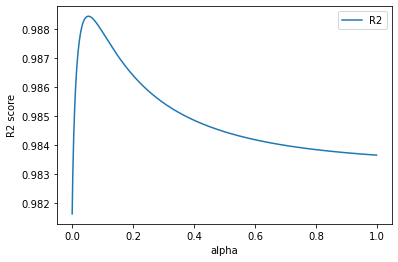

alpha with highest r^2 score : 0.053
alpha with lowest mse score : 0.053


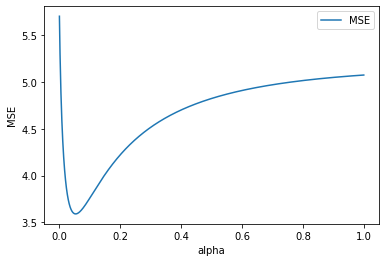

In [275]:
alpa = np.arange(0,1,0.001)
alpa

score = []
ms = []
for i in alpa:
    ridge = Ridge(alpha=i)
    ridge.fit(Xtrain,y_train) ## training the model
    pred = ridge.predict(Xtest) #predicting the price sunf ridge regression
    score.append(r2_score(y_test, pred))
    ms.append(mean_squared_error(y_test, pred))
    
plt.plot(alpa, score, label = 'R2')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend()
plt.show()
plt.plot(alpa, ms, label = 'MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
print('alpha with highest r^2 score :', alpa[score.index(max(score))])
print('alpha with lowest mse score :', alpa[ms.index(min(ms))])

a3 = alpa[ms.index(min(ms))]

In [276]:
ridge = Ridge(alpha=a3)
ridge.fit(Xtrain,y_train)
pred_ridge_num = ridge.predict(Xtest)

mse_num.append(mean_squared_error(pred_ridge_num,y_test))
r2_num.append(r2_score(y_test, pred_ridge_num))
rmse_num.append(mean_squared_error(y_test,pred_ridge_num,squared=False))
mae_num.append(mean_absolute_error(y_test,pred_ridge_num))
print('Mean Squared error: ',mean_squared_error(pred_ridge_num,y_test))

Mean Squared error:  3.5890787012816188


In [277]:
y_test.index

DatetimeIndex(['2022-06-02', '2022-06-03', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13',
               '2022-06-14', '2022-06-15',
               ...
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-25', '2022-11-28'],
              dtype='datetime64[ns]', name='Date', length=114, freq=None)

### Visualising predictions from numerical data

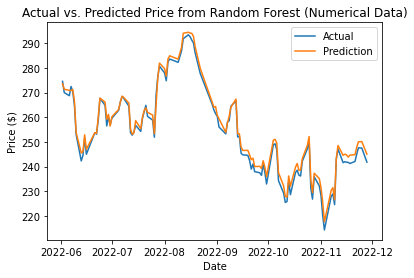

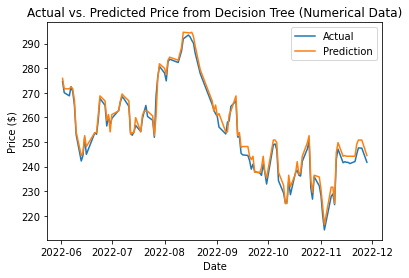

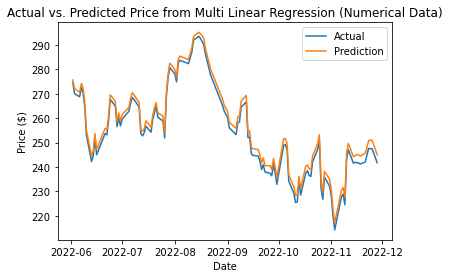

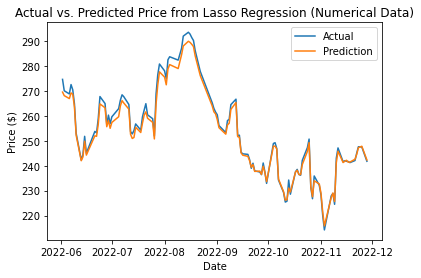

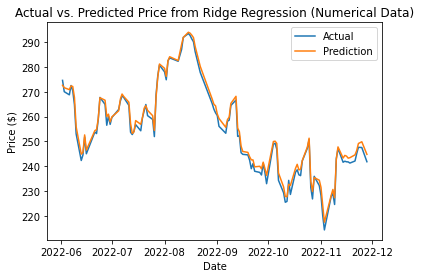

In [278]:
pred_real(pred_rf_num, 'Random Forest (Numerical Data)')
plt.show()
pred_real(pred_tree_num,'Decision Tree (Numerical Data)')
plt.show()
pred_real(pred_mlr_num, 'Multi Linear Regression (Numerical Data)')
plt.show()
pred_real(pred_lasso_num, 'Lasso Regression (Numerical Data)')
plt.show()
pred_real(pred_ridge_num, 'Ridge Regression (Numerical Data)')
plt.show()

### Evaluating the models from Numerical + Textual data

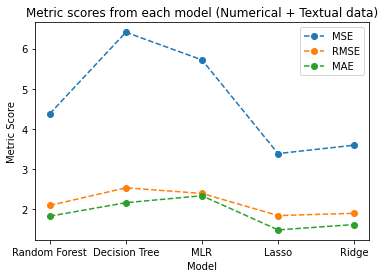

Text(0.5, 1.0, 'R2 score by model (Numerical + Textual data)')

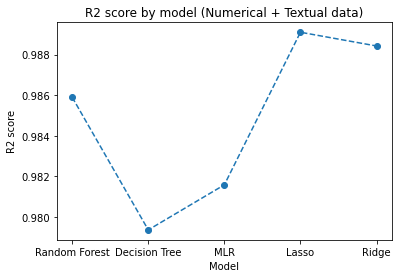

In [279]:
plt.plot(model, mse, 'o--',  label = 'MSE' )
plt.plot(model, rmse,'o--', label = 'RMSE')
plt.plot(model, mae, 'o--', label = 'MAE')
plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.title('Metric scores from each model (Numerical + Textual data)')
plt.legend()
plt.show()
plt.plot(model, r2, 'o--',  label = 'R2')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.title('R2 score by model (Numerical + Textual data)')

### Evaluating the models from Textual data

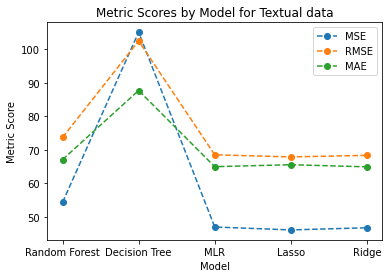

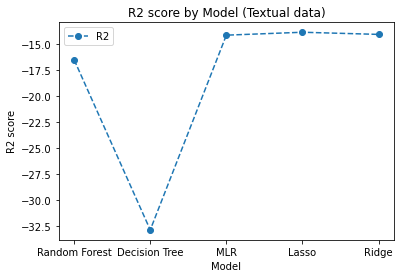

In [280]:
plt.plot(model, [i/100 for i in mse_text], 'o--',  label = 'MSE' )
plt.plot(model, rmse_text,'o--', label = 'RMSE')
plt.plot(model, mae_text, 'o--', label = 'MAE')
plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.title('Metric Scores by Model for Textual data')
plt.legend()
plt.show()
plt.plot(model, r2_text, 'o--',  label = 'R2')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.title('R2 score by Model (Textual data)')
plt.legend()

### Evaluating the models from Numerical data

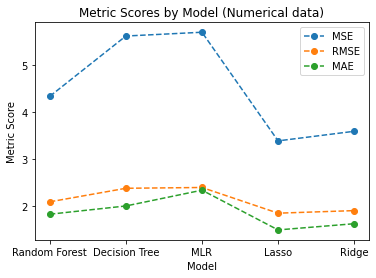

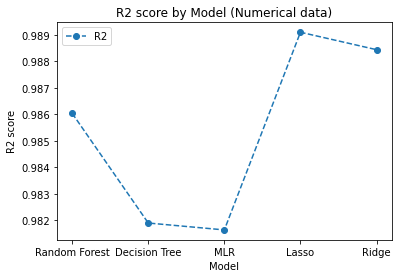

In [281]:
plt.plot(model, mse_num, 'o--',  label = 'MSE' )
plt.plot(model, rmse_num,'o--', label = 'RMSE')
plt.plot(model, mae_num, 'o--', label = 'MAE')
plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.title('Metric Scores by Model (Numerical data)')
plt.legend()
plt.show()
plt.plot(model, r2_num, 'o--',  label = 'R2')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.title('R2 score by Model (Numerical data)')
plt.legend()

### Creating a Dataframe of all the metric scores and r2 scores from all the models

In [282]:
table_mse = pd.DataFrame({'Metric': ['MSE']*5,'Model': model ,'Numerical + Textual':mse, 'Numerical':mse_num, 'Textual': mse_text, 'Difference':np.array(mse) - np.array(mse_num)})
table_rmse = pd.DataFrame({'Metric': ['RMSE']*5,'Model': model ,'Numerical + Textual':rmse, 'Numerical':rmse_num, 'Textual': rmse_text,'Difference':np.array(rmse) - np.array(rmse_num)})
table_mae = pd.DataFrame({'Metric': ['MAE']*5,'Model': model ,'Numerical + Textual':mae, 'Numerical':mae_num, 'Textual': mae_text, 'Difference':np.array(mae) - np.array(mae_num)})

In [283]:
table_r2 = pd.DataFrame({'Numerical + Textual':r2, 'Numerical':r2_num,'Textual': r2_text})
table_r2.index = model
table_r2 = table_r2.reset_index().rename(columns={"index": "Model"})
table_r2 ## r2 score table

Model  Numerical + Textual  Numerical    Textual
0  Random Forest             0.985903   0.986038 -16.499427
1  Decision Tree             0.979363   0.981890 -32.851090
2            MLR             0.981584   0.981630 -14.127731
3          Lasso             0.989102   0.989102 -13.846579
4          Ridge             0.988426   0.988444 -14.053807

In [284]:
m = pd.concat([table_mse,table_rmse,table_mae], axis = 0)
ndf = m.set_index(['Metric','Model'])
ndf

Numerical + Textual  Numerical       Textual  Difference
Metric Model                                                                  
MSE    Random Forest             4.378084   4.336218   5434.773321    0.041865
       Decision Tree             6.409127   5.624286  10513.087237    0.784841
       MLR                       5.719298   5.705137   4698.198876    0.014161
       Lasso                     3.384423   3.384423   4610.881844    0.000000
       Ridge                     3.594675   3.589079   4675.240439    0.005596
RMSE   Random Forest             2.092387   2.082359     73.720915    0.010028
       Decision Tree             2.531625   2.371558    102.533347    0.160068
       MLR                       2.391505   2.388543     68.543409    0.002963
       Lasso                     1.839680   1.839680     67.903474    0.000000
       Ridge                     1.895963   1.894486     68.375730    0.001476
MAE    Random Forest             1.824770   1.817398     67.107198    0.007372
       Decision Tree             2.160789   1.993684     87.735641    0.167105
       MLR                       2.334097   2.331108     64.991134    0.002989
       Lasso                     1.482044   1.482044     65.576773    0.000000
       Ridge                     1.615995   1.614281     64.945286    0.001713